In [5]:
import numpy as np
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import random
from nltk.corpus import wordnet as wn
from nltk.stem.wordnet import WordNetLemmatizer
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
nltk.download('wordnet')
nltk.download('stopwords')
sid = SentimentIntensityAnalyzer()
trump=pd.read_csv("D:\Final Year Project\Sentiment_analysis\KrealDonaldTrump_tweets.csv")
obama=pd.read_csv("D:\Final Year Project\Sentiment_analysis\KBarackObama_tweets.csv")
print(trump.shape)
print(obama.shape)


[nltk_data] Error loading wordnet: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
(3236, 3)
(3241, 3)


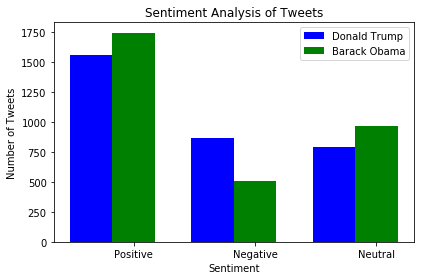

In [ ]:
trump_pos_count=0
trump_neg_count=0
trump_neu_count=0
obama_pos_count = 0
obama_neg_count = 0
obama_neu_count = 0
trump = trump[['text']].copy()
trump.to_csv('D:\\Final Year Project\\Sentiment_analysis\\KrealDonaldTrump_tweets_topic.csv')
obama=obama[['text']].copy()
obama.to_csv('D:\\Final Year Project\\Sentiment_analysis\\KBarackObama_tweets_topic.csv')
for i in range(0,trump.shape[0]):
    #print(sid.polarity_scores(trump["text"][i]))
    p = sid.polarity_scores(trump['text'][i]).get('pos')
    n = sid.polarity_scores(trump['text'][i]).get('neg')
    ne = sid.polarity_scores(trump['text'][i]).get('neu')
    if(p>n):
        trump_pos_count+=1
    elif(n>p):
        trump_neg_count+=1
    elif(ne==1.0):
        trump_neu_count+=1
for i in range(0,obama.shape[0]):
    #print(sid.polarity_scores(obama['text'][i]))
    p = sid.polarity_scores(obama['text'][i]).get('pos')
    n = sid.polarity_scores(obama['text'][i]).get('neg')
    ne = sid.polarity_scores(obama['text'][i]).get('neu')
    if (p > n):
        obama_pos_count += 1
    elif (n > p):
        obama_neg_count += 1
    elif (ne == 1.0):
        obama_neu_count += 1
'''print(trump_pos_count)
print(trump_neg_count)
print(trump_neu_count)
print(obama_pos_count)
print(obama_neg_count)
print(obama_neu_count)'''
trump_list=(trump_pos_count,trump_neg_count,trump_neu_count)
obama_list=(obama_pos_count,obama_neg_count,obama_neu_count)
n_groups = 3

 
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 1
 
rects1 = plt.bar(index, trump_list, bar_width,
alpha=opacity,
color='b',
label='Donald Trump')
 
rects2 = plt.bar(index + bar_width, obama_list, bar_width,
alpha=opacity,
color='g',
label='Barack Obama')
#plt.rcParams['figure.figsize'] = [5, 5]
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.title('Sentiment Analysis of Tweets')
plt.xticks(index + bar_width, ('Positive', 'Negative', 'Neutral'))
plt.legend()
 
plt.tight_layout()
plt.show()